# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
#imports
from citipy import citipy
from random import uniform # Draw samples from a uniform distribution
from api_keys import weather_api_key
from pprint import pprint
from scipy.stats import linregress
import numpy as np
import requests
import matplotlib.pyplot as plt
import pandas as pd

#output file
output_data_file = "output_data/cities.csv"
#api url
url = 'http://api.openweathermap.org/data/2.5/weather?'

## Generate Cities List

In [26]:
# Lat Long ranges and holding lists
lat_range = (-90, 90)
lng_range = (-180, 180)
lat_lngs = []
cities = []
weather_data_df = []


#randomise lat and long values with numpy and stoes in one variable (zipped)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#use citipy to identify nearest city to randomised tokens
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


len(cities)

586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval     ")
print("-----------------------------")

#counters
record_count = 1
set_count = 1

# city loops
for x, city in enumerate(cities):
    
    #grouped in 50s as requested.
    if (x % 50 == 0 and x >= 50):
        set_count+=1
        record_count = 1
    params = {"q": city, "units": "Imperial", "APPID": weather_api_key}
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    record_count+=1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(url, params=params).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_country = city_weather["sys"]["country"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_weather_desc = str(city_weather["weather"][0]["description"])
        # Append the city information into city_data list.
        weather_data_df.append({
            "City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Current Description": city_weather_desc})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | surt
Processing Record 4 of Set 1 | coihaique
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | avera
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | concarneau
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | damavand
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 1 | camacha
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | kismayo
Processing Record 22 of Set 1 | los llanos de aridane
Processing

Processing Record 34 of Set 4 | grand centre
City not found. Skipping...
Processing Record 35 of Set 4 | nantucket
Processing Record 36 of Set 4 | warrington
Processing Record 37 of Set 4 | kapaa
Processing Record 38 of Set 4 | amderma
City not found. Skipping...
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | santa maria
Processing Record 41 of Set 4 | verkhnyaya toyma
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | grindavik
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 46 of Set 4 | bilma
Processing Record 47 of Set 4 | prince rupert
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | pevek
Processing Record 2 of Set 5 | neiafu
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | nata
Processing Recor

Processing Record 22 of Set 8 | dubbo
Processing Record 23 of Set 8 | vzmorye
Processing Record 24 of Set 8 | joacaba
Processing Record 25 of Set 8 | lana
Processing Record 26 of Set 8 | jalu
Processing Record 27 of Set 8 | kishtwar
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | saint anthony
Processing Record 30 of Set 8 | tacana
Processing Record 31 of Set 8 | gubkinskiy
Processing Record 32 of Set 8 | coolum beach
Processing Record 33 of Set 8 | freeport
Processing Record 34 of Set 8 | causapscal
Processing Record 35 of Set 8 | port hardy
Processing Record 36 of Set 8 | ulaangom
Processing Record 37 of Set 8 | shingu
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | togur
Processing Record 40 of Set 8 | korla
Processing Record 41 of Set 8 | markova
Processing Record 42 of Set 8 | francistown
Processing Record 43 of Set 8 | prokuplje
Processing Record 44 of Set 8 | ouallam
Processing Record 45 of Set 8 | cabo san lucas
Processing Recor

Processing Record 11 of Set 12 | lewiston
Processing Record 12 of Set 12 | gisborne
Processing Record 13 of Set 12 | hervey bay
Processing Record 14 of Set 12 | torbat-e jam
Processing Record 15 of Set 12 | mount gambier
Processing Record 16 of Set 12 | curico
Processing Record 17 of Set 12 | kushiro
Processing Record 18 of Set 12 | poum
Processing Record 19 of Set 12 | ketchikan
Processing Record 20 of Set 12 | singaraja
Processing Record 21 of Set 12 | liaoyang
Processing Record 22 of Set 12 | raton
Processing Record 23 of Set 12 | kerki
City not found. Skipping...
Processing Record 24 of Set 12 | villa rica
Processing Record 25 of Set 12 | constantine
Processing Record 26 of Set 12 | maputo
Processing Record 27 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 28 of Set 12 | huntington
Processing Record 29 of Set 12 | rabo de peixe
Processing Record 30 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 31 of Set 12 | athol
Processing Record 32 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df = pd.DataFrame(weather_data_df).sort_index(axis=1)
weather_data_df.to_csv('cities.csv')
weather_data_df




,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saldanha,24,ZA,few clouds,57,-33.0117,17.9442,93.25,13.62
1,Castro,99,BR,overcast clouds,86,-24.7911,-50.0119,71.67,6.46
2,Surt,7,LY,clear sky,36,31.2089,16.5887,64.87,12.50
3,Coihaique,0,CL,clear sky,87,-45.5752,-72.0662,50.61,3.44
4,Nikolskoye,100,RU,overcast clouds,92,59.7035,30.7861,22.87,12.71
...,...,...,...,...,...,...,...,...,...
548,Bowen,92,AU,overcast clouds,70,-20.0167,148.2333,77.22,19.86
549,Harper,84,LR,broken clouds,65,4.3750,-7.7169,84.94,4.94
550,Usogorsk,64,RU,broken clouds,97,63.4106,48.6872,7.12,3.31
551,Manali,76,IN,broken clouds,77,13.1667,80.2667,86.09,9.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data = weather_data_df[weather_data_df["Humidity"] < 100]
weather_data

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saldanha,24,ZA,few clouds,57,-33.0117,17.9442,93.25,13.62
1,Castro,99,BR,overcast clouds,86,-24.7911,-50.0119,71.67,6.46
2,Surt,7,LY,clear sky,36,31.2089,16.5887,64.87,12.50
3,Coihaique,0,CL,clear sky,87,-45.5752,-72.0662,50.61,3.44
4,Nikolskoye,100,RU,overcast clouds,92,59.7035,30.7861,22.87,12.71
...,...,...,...,...,...,...,...,...,...
548,Bowen,92,AU,overcast clouds,70,-20.0167,148.2333,77.22,19.86
549,Harper,84,LR,broken clouds,65,4.3750,-7.7169,84.94,4.94
550,Usogorsk,64,RU,broken clouds,97,63.4106,48.6872,7.12,3.31
551,Manali,76,IN,broken clouds,77,13.1667,80.2667,86.09,9.08


In [10]:
#  Get the indices of cities that have humidity over 100%.
bad_weather_data = weather_data_df[weather_data_df["Humidity"] > 100]
bad_weather_data

,City,Cloudiness,Country,Current Description,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

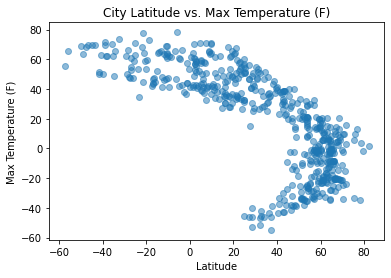

This coode analyses the relationship between city latitude and max temperature. There appears to be a negative linear relationship with max temperature and latitude. That is to say that generally temperature decreases as latitude increases e.g. gets closer to the equator.


<Figure size 432x288 with 0 Axes>

In [13]:
#Temperature (F) vs. Latitude - scatter plot
x_values = weather_data["Max Temp"]-32*(5/9)
y_values = weather_data["Lat"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (F)')
plt.show()
plt.savefig('lat_vs_temp.png')

print("This coode analyses the relationship between city latitude and max temperature. There appears to be a negative linear relationship with max temperature and latitude. That is to say that generally temperature decreases as latitude increases e.g. gets closer to the equator.")

## Latitude vs. Humidity Plot

In [ ]:
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity (%)')
plt.show()
plt.savefig('lat_vs_humidity.png')

print("This code analyses the relationship between humidity and city latitude. There is an even spread of distribution when latitude is measured against humidty. There is a cluster of high humidity cities where the latitude is also closer to it's max rating.")

## Latitude vs. Cloudiness Plot

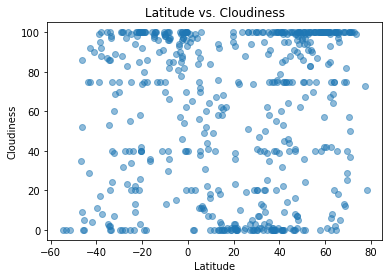

This code is analysing the relationship between Latitude and City Cloudiness. Visually, there appears to be no relationship between Latitude and Cloudiness. There are concentrated cloudiness values across latitude at 100 and 0.


<Figure size 432x288 with 0 Axes>

In [14]:
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness')
plt.show()

plt.savefig('lat_vs_cloudiness.png')

print("This code is analysing the relationship between Latitude and City Cloudiness. Visually, there appears to be no relationship between Latitude and Cloudiness. There are concentrated cloudiness values across latitude at 100 and 0.")

## Latitude vs. Wind Speed Plot

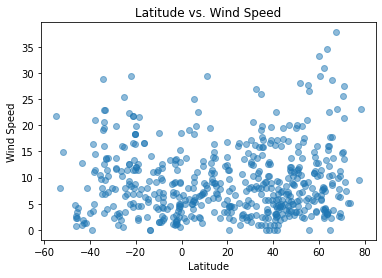

This plot compares wind speed to city latitude. Wind speed appears to have higher values towards higher latitudes.


<Figure size 432x288 with 0 Axes>

In [15]:
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Latitude vs. Wind Speed')
plt.show()
plt.savefig('lat_vs_windspeed.png')
print("This plot compares wind speed to city latitude. Wind speed appears to have higher values towards higher latitudes.")

## Linear Regression

In [16]:
northlat = weather_data.loc[weather_data['Lat'] >= 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 R-Squared = -0.823


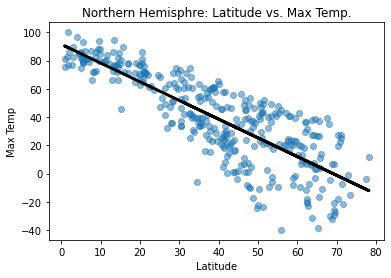

In [17]:

x_values = northlat["Lat"]
y_values = northlat["Max Temp"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphre: Latitude vs. Max Temp.')

linreg = linregress(northlat['Lat'], northlat['Max Temp'])
linear_equation = linreg[0] * northlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(northlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.savefig('North - lat_vs_max temp.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 R-Squared = 0.593


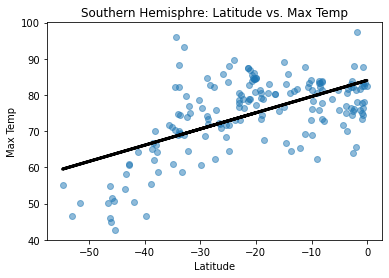

Both plots have negative and positive linear relationships respectively as values increase. This indicates that as cities move further away from the equator the max temp. falls.


<Figure size 432x288 with 0 Axes>

In [18]:
southlat = weather_data.loc[weather_data['Lat'] <= 0]


x_values = southlat["Lat"]
y_values = southlat["Max Temp"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Hemisphre: Latitude vs. Max Temp')

linreg = linregress(southlat['Lat'], southlat['Max Temp'])
linear_equation = linreg[0] * southlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(southlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.show()
plt.savefig('South - lat_vs_max temp.png')
print("Both plots have negative and positive linear relationships respectively as values increase. This indicates that as cities move further away from the equator the max temp. falls.")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 R-Squared = 0.438


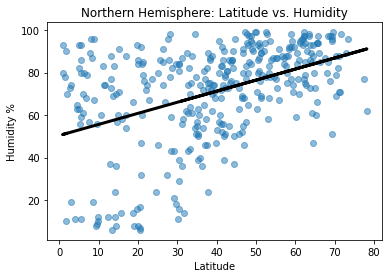

In [19]:

x_values = northlat["Lat"]
y_values = northlat["Humidity"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title(f'Northern Hemisphere: Latitude vs. Humidity')

linreg = linregress(northlat['Lat'], northlat['Humidity'])
linear_equation = linreg[0] * northlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(northlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.savefig('North - lat_vs_humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 R-Squared = 0.12


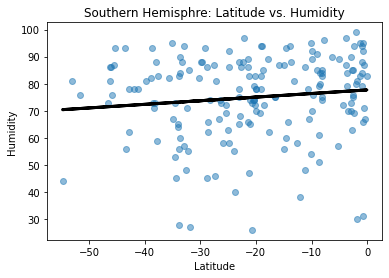

Plots both have a positive linear relationship meaning that as Latitude increases then so does humidity.


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = southlat["Lat"]
y_values = southlat["Humidity"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphre: Latitude vs. Humidity')

linreg = linregress(southlat['Lat'], southlat['Humidity'])
linear_equation = linreg[0] * southlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(southlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.show()
plt.savefig('South - lat_vs_humidity.png')

print("Plots both have a positive linear relationship meaning that as Latitude increases then so does humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 R-Squared = 0.33


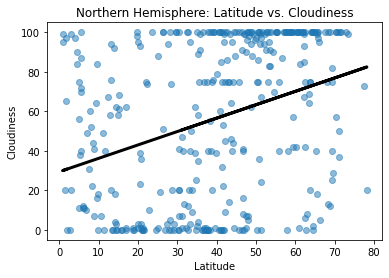

In [21]:
x_values = northlat["Lat"]
y_values = northlat["Cloudiness"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness')

linreg = linregress(northlat['Lat'], northlat['Cloudiness'])
linear_equation = linreg[0] * northlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(northlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.savefig('North - lat_vs_cloudiness.png')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 R-Squared = 0.392


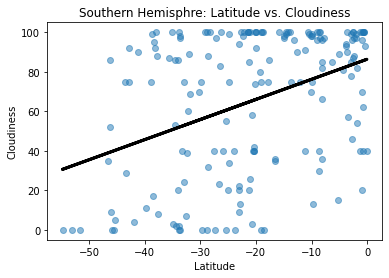

Both plots have positive linear relationships which suggests as latitude increases so does cloudiness


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = southlat["Lat"]
y_values = southlat["Cloudiness"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphre: Latitude vs. Cloudiness')

linreg = linregress(southlat['Lat'], southlat['Cloudiness'])
linear_equation = linreg[0] * southlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(southlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.show()
plt.savefig('South - lat_vs_cloudiness.png')

print("Both plots have positive linear relationships which suggests as latitude increases so does cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 R-Squared = 0.138


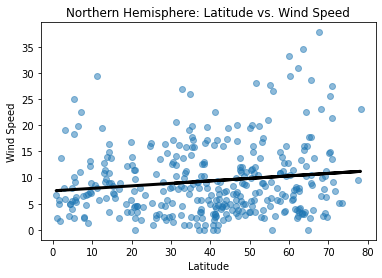

In [23]:
x_values = northlat["Lat"]
y_values = northlat["Wind Speed"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere: Latitude vs. Wind Speed')

linreg = linregress(northlat['Lat'], northlat['Wind Speed'])
linear_equation = linreg[0] * northlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(northlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.savefig('North - lat_vs_windspeed.png')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 R-Squared = -0.168


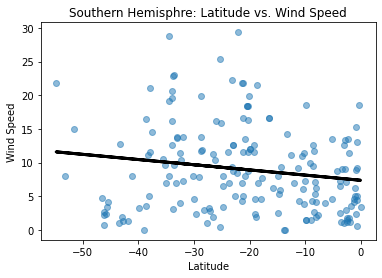

The r value for each hemisphere is closer to zero than others mean that latitude may not have a large affect on windspeed.


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = southlat["Lat"]
y_values = southlat["Wind Speed"]
plt.scatter(x_values,y_values, alpha = .5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphre: Latitude vs. Wind Speed')

linreg = linregress(southlat['Lat'], southlat['Wind Speed'])
linear_equation = linreg[0] * southlat['Lat'] + linreg[1]
print (f' R-Squared = {round((linreg[2]),3)}')

plt.plot(southlat['Lat'], linear_equation, linewidth = 3, color = 'black')
plt.show()
plt.savefig('South - lat_vs_windspeed.png')

print("The r value for each hemisphere is closer to zero than others mean that latitude may not have a large affect on windspeed.")